In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from  tensorflow import keras 
sys.path.append("..") # Adds higher directory to python modules path.
import brevis
from brevis import branches
from brevis import evaluate

In [33]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [7]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 10), dtype=tf.float32, name=None))>

In [27]:
import random
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = tf.keras.models.load_model('./models/alexNetv6_entropy_conv2d.hdf5')
model.summary()
# model.evaluate(test_ds)
# model.add_targets(10)
# model.add_branches(branches.branch.newBranch_flatten_evidence,
#                           ["max_pooling2d",
#                             "max_pooling2d_1",
#                             "dense"
#                           ],
#                           target_input=True,loop=False,num_outputs=10)
            
# model.compile(loss=[loss_fn], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()

Model: "model_2_branched"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 55, 55, 96)   34944       ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 96)  384         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                   

In [29]:
test_set = brevis.dataset.prepare.test_set(tf.keras.datasets.cifar100.load_data(label_mode="fine"),32,(227,227),include_targets=False,num_outputs = 100)
# model.evaluate(test_ds)

targetsis : False


In [5]:
model.fit(train_ds,validation_ds, epochs=1)

Setting Main Layers  and branch layers training to true


InvalidArgumentError: in user code:

    File "..\brevis\utils\utils.py", line 795, in entropyLoss  *
        indexes = tf.where(tf.math.equal(pred_labels, tf.cast(tf.reshape(y_true,pred_labels.shape),'int64')))

    InvalidArgumentError: Input to reshape is a tensor with 320 values, but the requested shape has 32 [Op:Reshape]


In [ ]:
# train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)
# plain_model = tf.keras.models.load_model('../models/alexNetv6_logits.hdf5')
# plain_model.evaluate(test_ds)


In [ ]:
model.evaluate(test_ds)

Entropy
----
<hr>


In [13]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [3]:
import random
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = tf.keras.models.load_model('./models/alexNetv6_entropy_conv2d.hdf5')
model.summary()
# model.evaluate(test_ds)
# model.add_targets(10)
# model.add_branches(branches.branch.newBranch_flatten_evidence,
#                           ["max_pooling2d",
#                             "max_pooling2d_1",
#                             "dense"
#                           ],
#                           target_input=True,loop=False,num_outputs=10)
            
# model.compile(loss=[loss_fn], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()

Model: "model_2_branched"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 55, 55, 96)   34944       ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 96)  384         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                   

In [22]:
# SVM reliability diagram with calibration
def classification(y, prob, bins =10):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    linspace = np.linspace(0,1,num=bins)
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(mpv, fop, marker='.')
    pyplot.show()

import math
    
# SVM reliability diagram with calibration
def cumulativeClassification(y, prob, bins =10, thresholdType = ">="):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    print("max",max(prob))
    linspace = np.linspace(0,math.ceil(max(prob)),num=bins)
    # pyplot.hist(prob,bins=linspace,density=False)
    accuracy = []
    throughputs = []
    for point in linspace:
        true = 0
        false = 0   
        throughput = 0
        for i, p in enumerate(prob):
            
            if threshold == ">=":
                if p >= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
            else:
                if p <= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
        try:
            accuracy.append(true/(true+false))
            throughputs.append(throughput/len(prob))
            # print(point, throughput/len(prob))                
        except:
            accuracy.append(0)
            throughputs.append(0)
            pass
    # print(throughputs)
    pyplot.plot(linspace[:len(throughputs)], throughputs,label="Accepted (y) for threshold (x)")
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot calibrated reliability
    # pyplot.plot(mpv, fop, marker='.',label="calibration")
    # fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    # pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(linspace[:len(accuracy)], accuracy, marker='.',color='blue',label="Accuracy")
    pyplot.legend(loc="upper right")
    pyplot.legend(bbox_to_anchor=(1.1, 1.05))
    pyplot.xlabel('Probability/Evidence')
    # pyplot.set_ylabel('Rating')
    pyplot.show()
    

In [48]:
def calcEntropy_Tensors2(y_hat):
    #entropy is the sum of y * log(y) for all possible labels.
    #doesn't deal with cases of log(0)
    val = y_hat * (tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype)))
    # print(val)
    # print(tf.boolean_mask(val,tf.math.is_finite(val)))
    sumEntropies =  tf.reduce_sum(tf.boolean_mask(val,tf.math.is_finite(val)))
    
    return -sumEntropies


def getPredictions(model,dataset,stopping_point=None):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    print("outputs",num_outputs)
    #     train_ds, test_ds, validation_ds = (dataset)
    Results=[]
    Pred=[]
    Labels =[]
    Outputs = pd.DataFrame()
    pAcc=[]
    for i in range(num_outputs):
        Results.append([])
        Pred.append([])
        Labels.append([])
    for i, (x,y) in enumerate(dataset):
        if stopping_point and i > stopping_point:
            break
        try:
            print("prediction: {} of {}".format(i,len(dataset)),end='\r')
        except:
            print("prediction: {}".format(i),end='\r')
            pass
        predictions = model.predict(x)
        for k, outputs in enumerate(predictions[0]):
            # print("output ", k, outputs)
            for j, prediction in enumerate(outputs):
                # print(prediction)
                # for pred
                Results[k].append(np.argmax(prediction))
                # Pred[k].append((np.amax(tf.nn.softplus(prediction))))
                # print(brevis.utils.calcEntropy_Tensors((prediction)).numpy())
                Pred[k].append(calcEntropy_Tensors2((prediction)).numpy())
                
                Labels[k].append(np.argmax(y[j]))
    Outputs=[]
    for j in range(num_outputs):
        df = pd.DataFrame({"x":Results[j],"y":Labels[j],"probs":Pred[j]})
        conditions = [df['x'] == df['y'],df['x'] != df['y']]
        choices = [1, 0]
        #create new column in DataFrame that displays results of comparisons
        df['testy'] = np.select(conditions, choices, default=None)

        Outputs.append(df)
    return Outputs

In [49]:
noisy_test_set = tf.data.Dataset.sample_from_datasets([test_ds,test_set],weights=[.9,.1])
noisy_test_set

<_DirectedInterleaveDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, None), dtype=tf.float32, name=None))>

In [50]:
outputs = getPredictions(model,noisy_test_set,100)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

outputs 4
dense_2/Softmax:0


,x,y,probs,testy
0,3,3,6.788521e-03,1
1,8,8,5.267519e-06,1
2,1,8,9.500215e-01,0
3,0,0,1.291475e-04,1
4,6,6,2.585704e-02,1
...,...,...,...,...
3227,0,2,1.276291e-01,0
3228,4,4,1.263983e-02,1
3229,0,0,9.056739e-01,1
3230,5,5,8.681874e-03,1


branch_softmax_6/Softmax:0


,x,y,probs,testy
0,3,3,0.129346,1
1,8,8,0.005831,1
2,8,8,1.421347,1
3,0,0,0.000731,1
4,6,6,1.227743,1
...,...,...,...,...
3227,2,2,1.036428,1
3228,3,4,1.093577,0
3229,2,0,0.058199,0
3230,5,5,0.494141,1


branch_softmax_7/Softmax:0


,x,y,probs,testy
0,3,3,0.509121,1
1,8,8,0.003009,1
2,8,8,0.023703,1
3,0,0,0.217221,1
4,6,6,0.030713,1
...,...,...,...,...
3227,2,2,0.633497,1
3228,4,4,0.775325,1
3229,2,0,0.388317,0
3230,5,5,0.032436,1


branch_softmax_8/Softmax:0


,x,y,probs,testy
0,3,3,5.012212e-03,1
1,8,8,2.179291e-06,1
2,1,8,1.204313e+00,0
3,0,0,1.502304e-05,1
4,6,6,2.819453e-02,1
...,...,...,...,...
3227,0,2,4.512570e-01,0
3228,4,4,1.122526e-03,1
3229,0,0,7.890740e-01,1
3230,5,5,7.282763e-03,1


In [55]:
for predictions in outputs: 
    outliers = predictions.loc[(predictions['y'] > 9)]
    print(outliers)
    print(len(outliers)/len(predictions))

      x   y     probs testy
1664  2  49  0.000123     0
1665  4  33  0.433526     0
1666  4  72  0.737555     0
1667  4  51  2.271723     0
1668  0  71  0.262243     0
...  ..  ..       ...   ...
2971  3  81  1.189958     0
2972  3  94  0.549098     0
2973  0  27  1.065616     0
2974  0  76  0.130663     0
2975  2  77  1.997437     0

[202 rows x 4 columns]
0.0625
      x   y     probs testy
1664  2  49  1.014926     0
1665  4  33  0.000373     0
1666  4  72  0.567480     0
1667  9  51  1.877998     0
1668  8  71  0.173401     0
...  ..  ..       ...   ...
2971  8  81  1.700122     0
2972  9  94  0.004166     0
2973  0  27  1.721396     0
2974  4  76  1.001544     0
2975  9  77  0.039261     0

[202 rows x 4 columns]
0.0625
      x   y     probs testy
1664  2  49  1.642508     0
1665  4  33  0.141929     0
1666  2  72  1.407289     0
1667  9  51  1.351562     0
1668  2  71  2.480396     0
...  ..  ..       ...   ...
2971  9  81  0.067112     0
2972  3  94  0.518960     0
2973  0  27  0

threshold 0.82319885
      x   y     probs testy
1665  4  33  0.000373     0
1666  4  72  0.567480     0
1668  8  71  0.173401     0
1670  4  15  0.559051     0
1671  6  14  0.160214     0
...  ..  ..       ...   ...
2966  3  97  0.104914     0
2967  4  59  0.676428     0
2969  2  67  0.219528     0
2972  9  94  0.004166     0
2975  9  77  0.039261     0

[118 rows x 4 columns]
outliers Accepted  0.5841584158415841
max 2.754915714263916


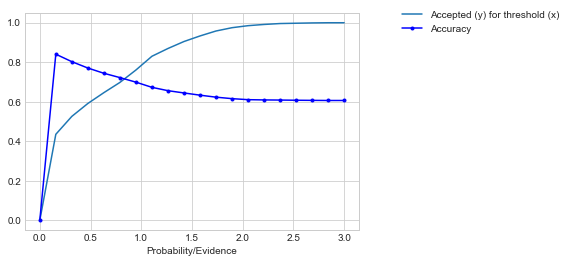

-----------------
rollover enabled, 929 predictions provided
threshold 1.0710969
      x   y     probs testy
1669  6  92  0.990911     0
1679  2  43  0.166822     0
1680  2  92  0.992468     0
1687  0  29  1.018189     0
1688  5  21  0.506558     0
1689  1  16  0.155030     0
1693  2  70  0.592535     0
1824  0  41  0.449547     0
1833  2  24  0.363664     0
1849  6  52  0.009952     0
2050  3  43  0.961584     0
2056  3  67  0.107717     0
2057  2  91  1.015006     0
2059  3  32  1.036908     0
2075  2  18  0.299709     0
2077  5  21  0.112924     0
2468  6  26  1.049709     0
2471  0  95  0.901973     0
2474  2  76  0.032548     0
2480  6  27  0.000537     0
2485  5  43  0.982207     0
2491  2  92  1.064960     0
2493  3  20  0.593857     0
2562  2  11  0.358993     0
2565  3  74  0.392264     0
2568  0  60  0.635117     0
2574  6  52  0.005514     0
2584  8  18  0.558309     0
2585  0  59  0.244544     0
2586  2  45  0.184299     0
2587  2  66  0.417570     0
2589  8  20  0.007782  

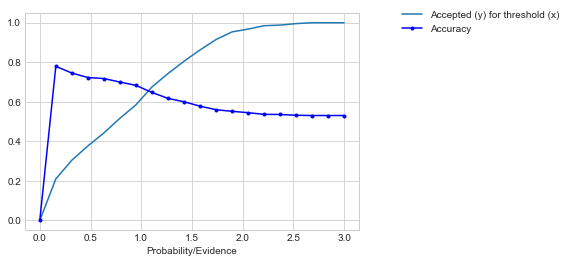

-----------------
rollover enabled, 322 predictions provided
threshold 0.5886713
      x   y     probs testy
1664  2  49  0.000003     0
1690  7  39  0.526885     0
1827  6  73  0.348084     0
1829  2  11  0.085107     0
1835  5  73  0.022543     0
1836  0  56  0.531792     0
1845  3  57  0.485692     0
2054  2  66  0.001858     0
2069  0  89  0.041986     0
2073  0  67  0.003206     0
2076  6  27  0.550534     0
2464  2  50  0.196392     0
2466  9  37  0.144932     0
2469  6  83  0.020913     0
2477  0  59  0.000673     0
2479  5  20  0.428868     0
2486  1  57  0.042584     0
2489  3  10  0.363725     0
2492  6  33  0.279960     0
2580  2  51  0.077123     0
2818  2  87  0.569378     0
2819  1  10  0.027743     0
2834  6  18  0.055662     0
2836  3  39  0.282375     0
2842  3  40  0.102031     0
2957  0  23  0.273264     0
2958  3  44  0.010194     0
2962  0  73  0.076061     0
2974  0  76  0.062467     0
outliers Accepted  0.6904761904761905
max 1.9736318588256836


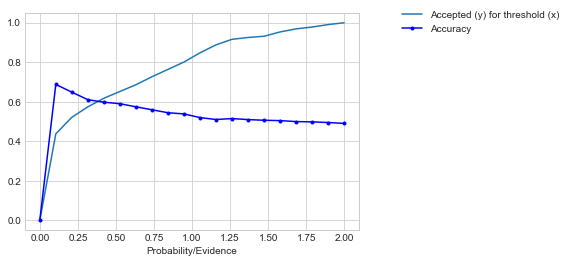

-----------------
rollover enabled, 105 predictions provided
threshold 0
Empty DataFrame
Columns: [x, y, probs, testy]
Index: []
outliers Accepted  0.0
max 2.2717227935791016


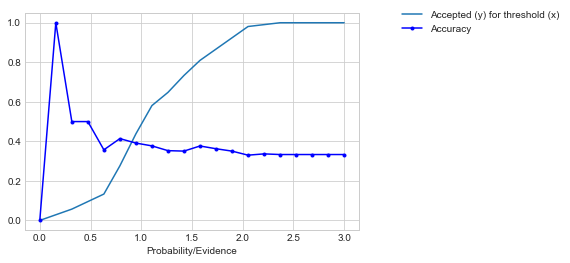

-----------------
thresholds [0.82319885, 1.0710969, 0.5886713, 0]
input_predictions [3232, 929, 322, 105]
Accepted_list [2303, 607, 217, 0]
Acceptance_correct [1653, 399, 125, 0]
overall Accuracy 0.6961944355612408
branch_cost [40171850810, 17857772468, 23482710769, 0]
base cost:  81512334047  total cost: 352409266426
cost difference:  0.2313002006833331


In [61]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
# Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    mean = output.loc[(output['testy'] == False)].groupby("testy")["probs"].mean().iloc[0]
    std = output.loc[(output['testy'] == False)].groupby("testy")["probs"].std().iloc[0]
    threshold = mean
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = 0
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["probs"] <= threshold)]
    Accepted_outliers = Accepted.loc[(Accepted['y']>9)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["probs"] > threshold)]
    Rejected_outliers = Rejected.loc[(Rejected['y']>9)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    print(Accepted_outliers)
    print("outliers Accepted ", len(Accepted_outliers)/(len(Accepted_outliers)+len(Rejected_outliers)))
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['probs'].tolist(),20,thresholdType="<=")
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


In [8]:
1015303831542
120020480229  

120020480229